# Lab 5: Feature Selection 

This notebook builds on top of Lab 4 by introducing feature selection into the process of selecting the best classifier for a binary classification problem.

The feature selection method applied here is Recursive Feature Elimination (RFE) as demonstrated in the tutorial at https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/.

In this demonstration we use a modified version of the seeds data set (see https://archive.ics.uci.edu/ml/datasets/seeds), which is the same data set used in Lab 4.

## A. Preparation

### Import Python modules

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Task 1

  * Repeat the experiment in Etivity5-Feature Selection.ipynb with winequality_red.csv and draw initial conclusions from the results you observe.

In [3]:
# Load Wine Dataset
t1_df = pd.read_csv("./winequality_red.csv")
t1_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
print("Number of Samples  in Dataset:\t",t1_df.shape[0])
print("Number of Features in Dataset:\t",t1_df.shape[1])

Number of Samples  in Dataset:	 1599
Number of Features in Dataset:	 12


In [5]:
# target attribute
target_attribute_name = 'quality'
target = t1_df[target_attribute_name]

print("\n****\t",'quality',"\t****")
print("Total Values = \t",t1_df['quality'].count(),"\n")
print(t1_df['quality'].value_counts(dropna=False))
print("****************************")


****	 quality 	****
Total Values = 	 1599 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64
****************************


#### Observations on Target Attribute
* 1599 total values split across 6 unique values
    * 5 = 42.6%
    * 6 = 39.9%
    * 7 = 12.4%
    * 4 =  3.3%
    * 8 =  1.1%
    * 3 =  0.6%
* Classes are very imbalanced
* Class 5 and 6 account for over 80% of samples
* Having only 10 samples in Class 3 will need to be taken into account if determinining the number of folds to be stratified later

In [6]:
# predictor attributes
predictors = t1_df.drop(target_attribute_name, axis=1).values

# # scale all predictor values to the range [0, 1]
# # note the target attribute is already binary
# min_max_scaler = preprocessing.MinMaxScaler()
# predictors = min_max_scaler.fit_transform(predictors)

Split the data set into a training (80%) and test (20%) data sets.

In [19]:
# pepare independent stratified data sets for training and test of the final model
predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictors, target, test_size=0.20, shuffle=True, stratify=target)

Scale the data after it has been split (updated based on Q&A and forum discussion on scaling)

In [20]:
min_max_scaler = preprocessing.MinMaxScaler()

# Fit and Transform the training set
predictors_train = min_max_scaler.fit_transform(predictors_train)

# Transform the test set
predictors_test = min_max_scaler.transform(predictors_test)

## B. Feature Selection

In [21]:
# Add variable to allow the number of features selected to be varied
num_features = 6

In [22]:
# Function to print details on selected features and ranking
def print_feature_selection(support, ranking, df):
    # Print Attributes that were selected/dropped
    print("The following features were selected (ranking):")
    for i in range(len(support)):
        if(support[i]==True):
            print("\t",df.columns[i], "(",ranking[i],")")

    print("The following features were NOT selected  (ranking):")
    for i in range(len(support)):
        if(support[i]==False):
            print("\t",df.columns[i], "(",ranking[i],")")
            
    return

#### 1. Apply RFE with SVM for selecting the best features

In [23]:
# create a base classifier used to evaluate a subset of attributes
estimatorSVM = svm.SVR(kernel="linear")
selectorSVM = RFE(estimatorSVM, num_features)
selectorSVM = selectorSVM.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorSVM.support_)
print(selectorSVM.ranking_)

[False  True False  True  True False  True False False  True  True]
[2 1 6 1 1 5 1 3 4 1 1]


In [24]:
print_feature_selection(selectorSVM.support_, selectorSVM.ranking_, t1_df)

The following features were selected (ranking):
	 volatile acidity ( 1 )
	 residual sugar ( 1 )
	 chlorides ( 1 )
	 total sulfur dioxide ( 1 )
	 sulphates ( 1 )
	 alcohol ( 1 )
The following features were NOT selected  (ranking):
	 fixed acidity ( 2 )
	 citric acid ( 6 )
	 free sulfur dioxide ( 5 )
	 density ( 3 )
	 pH ( 4 )


#### 2. Apply RFE with Logistic Regression for selecting the best features

In [25]:
# create a base classifier used to evaluate a subset of attributes
estimatorLR = LogisticRegression(solver='lbfgs', multi_class='auto')
# create the RFE model and select 3 attributes
selectorLR = RFE(estimatorLR, num_features)
selectorLR = selectorLR.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorLR.support_)
print(selectorLR.ranking_)

[False  True  True False  True False  True False False  True  True]
[3 1 1 4 1 6 1 2 5 1 1]


In [26]:
print_feature_selection(selectorLR.support_, selectorLR.ranking_, t1_df)

The following features were selected (ranking):
	 volatile acidity ( 1 )
	 citric acid ( 1 )
	 chlorides ( 1 )
	 total sulfur dioxide ( 1 )
	 sulphates ( 1 )
	 alcohol ( 1 )
The following features were NOT selected  (ranking):
	 fixed acidity ( 3 )
	 residual sugar ( 4 )
	 free sulfur dioxide ( 6 )
	 density ( 2 )
	 pH ( 5 )


## B. Evaluate on the Test Data Set

Apply the selectors to prepare training data sets only with the selected features

__Note:__ The same selectors are applied to the test data set. However, it is important that the test data set was not used by (it's invisible to) the selectors. 

In [27]:
predictors_train_SVMselected = selectorSVM.transform(predictors_train)
predictors_test_SVMselected = selectorSVM.transform(predictors_test)

In [28]:
predictors_train_LRselected = selectorLR.transform(predictors_train)
predictors_test_LRselected = selectorLR.transform(predictors_test)

### Train and evaluate SVM classifiers with both the selected features and all features 

Here we train three models:
* model1 - with the features selected by SVM
* model2 - with the features selected by Logistic Regression
* model3 - with all features (i.e. without feature selection)

In [37]:
classifier = svm.SVC()
#classifier = svm.SVC(class_weight="balanced") <-- Using the class weight to balance classes dropped performance to ~0.4

In [38]:
model1 = classifier.fit(predictors_train_SVMselected, target_train)
model1.score(predictors_test_SVMselected, target_test)

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.571875

In [39]:
model2 = classifier.fit(predictors_train_LRselected, target_train)
model2.score(predictors_test_LRselected, target_test)

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.565625

In [40]:
model3 = classifier.fit(predictors_train, target_train)
model3.score(predictors_test, target_test)

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5625

## Task 1 Conclustions


With the seeds dataset, there were only two output labels (0/1) but with the wine dataset there are now 6 output labels (3,4,5,6,7,8) which means the classification task has become a multiclass classification task.

The output classes are also not very well balanced  with over 80% of the output labels being either 5 or 6. There are 11 feature attributes that are available to make the prediction.

As there are more features, I increased the number of features to be selected to 6 (although this can now be easily varied using a num_features variable). I also added a function to display what features were selected or not selected and how they were ranked.

Using this with num_features=6, SVM and LR both chose a different set of 6 features. Interestingly, both methods also had different lowest rank features (citric acid for SVM and pH for LR).

The three models performed similarly with a score of ~60-61%. The model that used 6 features chosen by RFE with Logisitic Regression peformed best.


**Features selected by SVM Selector:**

The following features were selected (ranking):
 * alcohol ( 1 )
 * chlorides ( 1 )
 * density ( 1 )
 * fixed acidity ( 1 )
 * sulphates ( 1 )
 * volatile acidity ( 1 )

The following features were NOT selected  (ranking):

 * residual sugar ( 2 )
 * total sulfur dioxide ( 3 )
 * pH ( 4 )
 * free sulfur dioxide ( 5 )
 * citric acid ( 6 )
 
**Features selected by Logistic Regression Selector:**

The following features were selected (ranking):
 * alcohol ( 1 )
 * citric acid ( 1 )
 * density ( 1 )
 * sulphates ( 1 )
 * total sulfur dioxide ( 1 )
 * volatile acidity ( 1 )

The following features were NOT selected  (ranking):
 * fixed acidity ( 2 )
 * residual sugar ( 3 )
 * free sulfur dioxide ( 4 )
 * chlorides ( 5 )
 * pH ( 6 )


# Task 2
* Repeat the experiment in Etivity5-Feature Selection.ipynb with winequality_red.csv but this time run the whole experiment in a loop with different training/test stratified splits. Evaluate the three models for each iteration of the loop separately and boxplot the accuracies of the models for each iteration. Compare the results of this experiment to the results of Task 1 in a markdown cell (max 150 words).

In [58]:
# Create an array with a range of train/test split sizes 
# The range is from 0.1 to 0.2 which gives a test size from 10% to 20%

# Test Split Sizes
split_increment = 0.02
splits = np.arange(0.1,0.2+split_increment,split_increment)
print(splits)

[0.1  0.12 0.14 0.16 0.18 0.2 ]


In [59]:
# Create an array to control the number of features that are to be selected in the loop

# Number of Features to be selected
nfeatures = np.arange(3,12,1)
print(nfeatures)

[ 3  4  5  6  7  8  9 10 11]


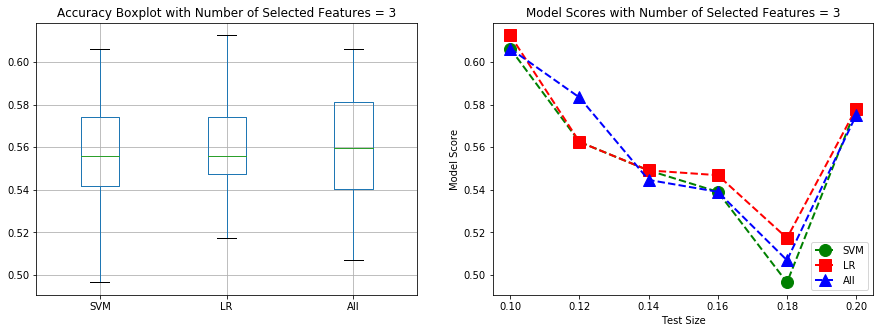

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


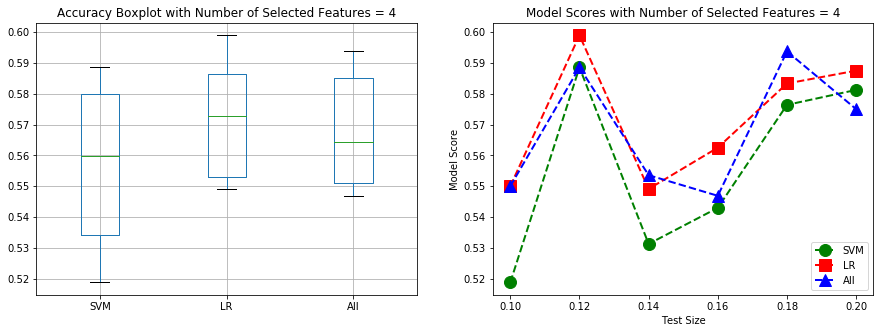

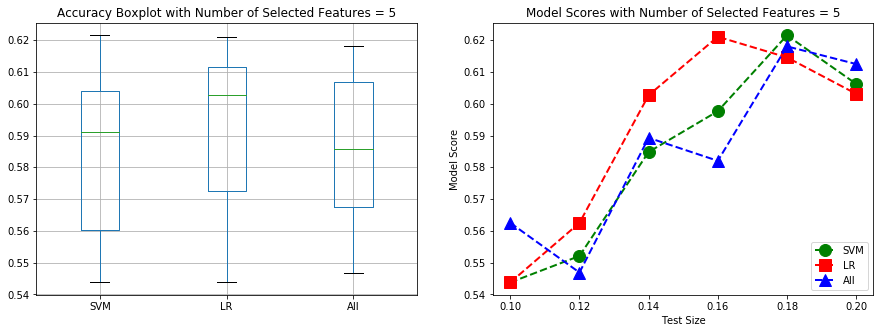

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


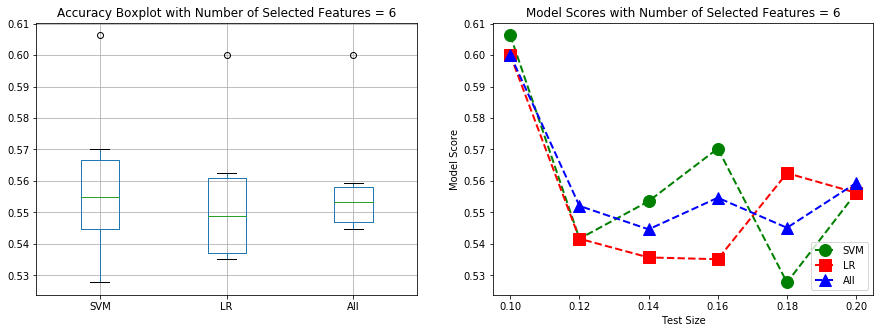

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


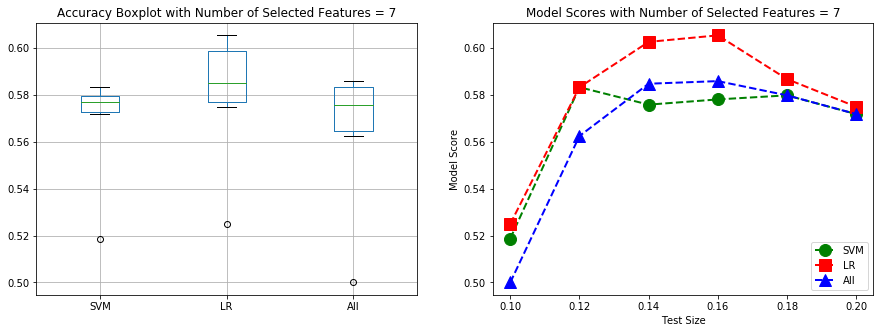

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


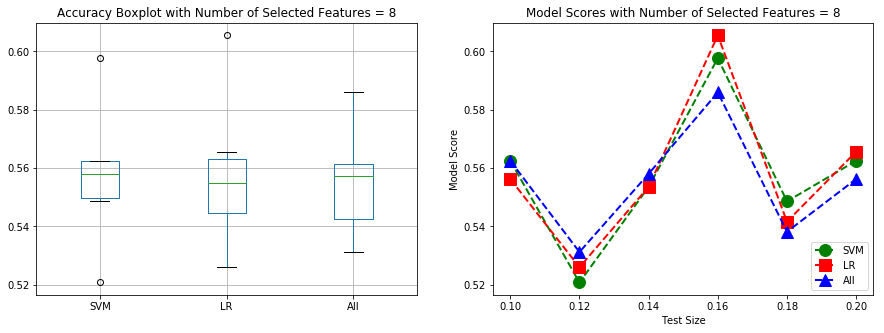

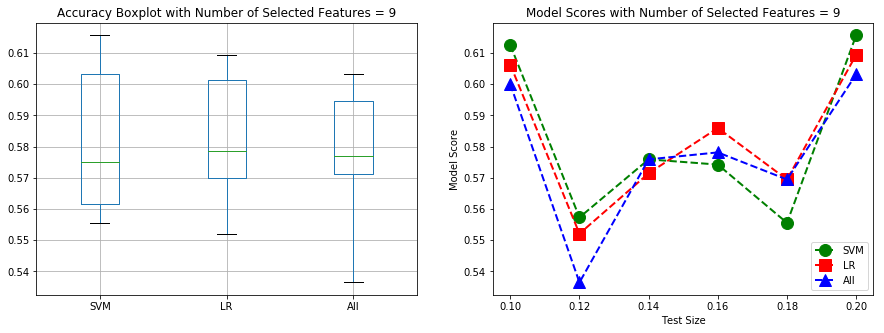

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


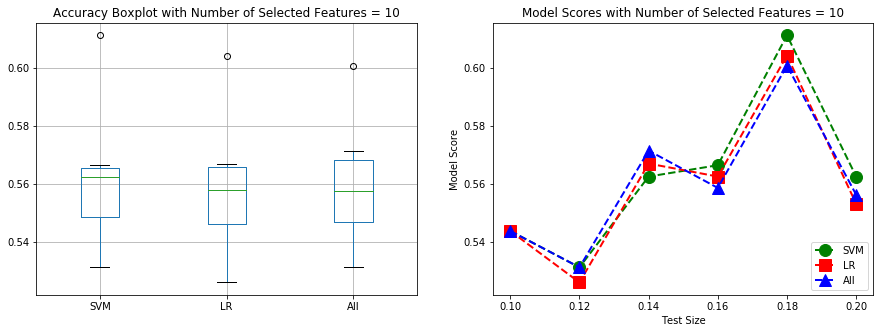

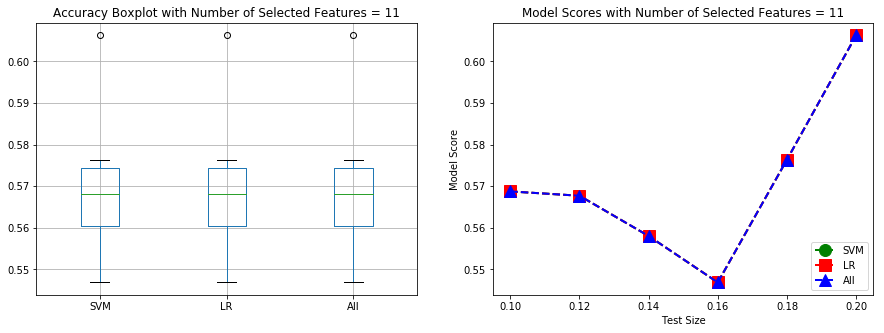

In [60]:
# Use these arrays to store the mean scores of each model across all number of selected features
model1_mean_scores = []
model2_mean_scores = []
model3_mean_scores = []

# Iterate across all values of selected features
for n in range(len(nfeatures)):
    # Initialize empty arrays to store scores on each iteration of selected features
    model1_scores = []
    model2_scores = []
    model3_scores = []
    
    # Initialize empty arrays to store sum scores on each iteration of selected features
    model1_sum_scores = 0
    model2_sum_scores = 0
    model3_sum_scores = 0
    
    # Iterate across all values of test size
    for i in range (len(splits)):
        # pepare independent stratified data sets for training and test of the final model
        t2_predictors_train, t2_predictors_test, t2_target_train, t2_target_test = train_test_split(
            predictors, target, test_size=splits[i], shuffle=True, stratify=target)
        
        # Scale the data
        t2_min_max_scaler = preprocessing.MinMaxScaler()

        # Fit and Transform the training set
        t2_predictors_train = t2_min_max_scaler.fit_transform(t2_predictors_train)

        # Transform the test set
        t2_predictors_test = t2_min_max_scaler.transform(t2_predictors_test)

        # create a base classifier used to evaluate a subset of attributes
        estimatorSVM = svm.SVR(kernel="linear")
        selectorSVM = RFE(estimatorSVM, nfeatures[n])
        selectorSVM = selectorSVM.fit(t2_predictors_train, t2_target_train)

        # create a base classifier used to evaluate a subset of attributes
        estimatorLR = LogisticRegression(solver='lbfgs', multi_class='auto')
        # create the RFE model and select 3 attributes
        selectorLR = RFE(estimatorLR, nfeatures[n])
        selectorLR = selectorLR.fit(t2_predictors_train, t2_target_train)

        predictors_train_SVMselected = selectorSVM.transform(t2_predictors_train)
        predictors_test_SVMselected = selectorSVM.transform(t2_predictors_test)

        predictors_train_LRselected = selectorLR.transform(t2_predictors_train)
        predictors_test_LRselected = selectorLR.transform(t2_predictors_test)

        classifier = svm.SVC(gamma='auto')

        model1 = classifier.fit(predictors_train_SVMselected, t2_target_train)
        model1_scores.append(model1.score(predictors_test_SVMselected, t2_target_test))
        model1_sum_scores += model1.score(predictors_test_SVMselected, t2_target_test)

        model2 = classifier.fit(predictors_train_LRselected, t2_target_train)
        model2_scores.append(model2.score(predictors_test_LRselected, t2_target_test))
        model2_sum_scores += model2.score(predictors_test_LRselected, t2_target_test)

        model3 = classifier.fit(t2_predictors_train, t2_target_train)
        model3_scores.append(model3.score(t2_predictors_test, t2_target_test))
        model3_sum_scores += model3.score(t2_predictors_test, t2_target_test)

    # Compare the statistics of the accuracies across all cross-validation folds
    accuracies_df = pd.DataFrame(data={'SVM' : model1_scores, 'LR' : model2_scores, 'All' : model3_scores})

    plt.subplots(1, 2, figsize=(15, 5))
     
    # Print a box plot of the accuracies
    plt.subplot(1,2,1)
    bp = accuracies_df.boxplot()
    plt.title('Accuracy Boxplot with Number of Selected Features = ' + str(nfeatures[n]))
    
    # Print the model score vs the test size
    plt.subplot(1,2,2)
    plt.plot(splits, model1_scores, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label='SVM')
    plt.plot(splits, model2_scores, color='red', marker='s', linestyle='dashed', linewidth=2, markersize=12, label='LR')
    plt.plot(splits, model3_scores, color='blue', marker='^', linestyle='dashed', linewidth=2, markersize=12, label='All')
    plt.title('Model Scores with Number of Selected Features = ' + str(nfeatures[n]))
    plt.xlabel('Test Size')
    plt.ylabel('Model Score')
    plt.legend(loc="lower right")
    
    plt.show()
    
    # Calculate mean score for each model for given value of selected features
    model1_mean_scores.append(model1_sum_scores/len(splits))
    model2_mean_scores.append(model2_sum_scores/len(splits))
    model3_mean_scores.append(model3_sum_scores/len(splits))

In [65]:
# Calculate the mean accuracy per model
mean_accuracies_df = pd.DataFrame(data={'SVM' : model1_mean_scores, 'LR' : model2_mean_scores, 'All' : model3_mean_scores})
mean_accuracies_df.describe()

,SVM,LR,All
count,9.000000,9.000000,9.000000
mean,0.566273,0.569979,0.566599
std,0.010854,0.012537,0.009719
min,0.555262,0.555215,0.555361
25%,0.557612,0.559425,0.559321
50%,0.562920,0.570668,0.564166
75%,0.570668,0.579714,0.570668
max,0.584348,0.591288,0.585208


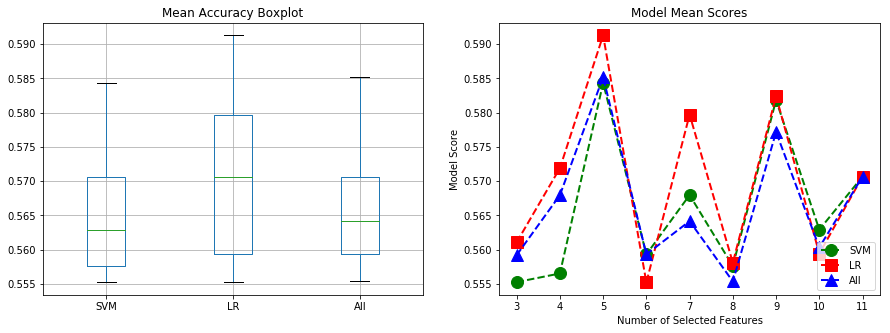

In [66]:
# Plot the mean accuracy per model and show how it varies based on the number of features selected

plt.subplots(1, 2, figsize=(15, 5))

plt.subplot(1,2,1)
mean_accuracies_df.boxplot()
plt.title('Mean Accuracy Boxplot')

plt.subplot(1,2,2)
plt.plot(nfeatures, model1_mean_scores, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label='SVM')
plt.plot(nfeatures, model2_mean_scores, color='red', marker='s', linestyle='dashed', linewidth=2, markersize=12, label='LR')
plt.plot(nfeatures, model3_mean_scores, color='blue', marker='^', linestyle='dashed', linewidth=2, markersize=12, label='All')
plt.title('Model Mean Scores')
plt.xlabel('Number of Selected Features')
plt.ylabel('Model Score')
plt.legend(loc="lower right")



## Task 2 Conclustions

The outer loop first iterated across a number of different test sizes. The goal here is to show the impact of the test size on performance.

The inner loop iterated across the number of features selected. The goal here is to show the impact of the number of retained features on the model performance.

Each iteration also runs the SVM model with "All" features retained. This is to show a reference of how the reduced feature models performed against the full feature model.

In task 1, model performance was in range 55-60% and the model that used logistic regression-based feature selection, on average performed better.

In task2, similar performance was seen in that the LR-based feature selection model on average outperformed the other two.

The performance varied based on the test size chosen but not in a very predictable way. The random nature of the change in performance suggests it is a function of the train/test split and the imbalanced classes. Using k-fold validation might alleviate this but was considered out of scope for this task.

In terms of feature selection, the ideal number of features to retain seems to be in range 5-9 features. Peaks were seen for 5,7 and 9 features although performance dropped when the number of features was 6 and 8. Cross validation the the feature selection would help narrow this down.

Performance for retaining all, or close to all, features was less than the models with reduced features which shows a clear benefit to performing feature selection prior to building the classifier


# Task 3
* Build two pipelines for training classifiers for the dataset winequality_red.csv and summarise the results from training classifiers with the pipelines in a markdown cell (max 150 words). The two pipelines should include feature-selection methods, and the feature-selection method in pipeline 1 should be different from the feature-selection method in pipeline 2.

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

## Pipeline 1
* Feature Selection Method = Anova Univariate Feature Selection
* Scaling Method = Min Max Scaling
* NOTE : Reusing the same test and training sets from Task 1

In [86]:
# create pipeline
estimators = []
# Using Anova Univariate Feature Selection
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_anova.html#sphx-glr-auto-examples-svm-plot-svm-anova-py
estimators.append(('feat_sel', SelectPercentile(chi2)))
estimators.append(('scale',    preprocessing.MinMaxScaler()))
estimators.append(('classify', svm.SVC()))
p1_model = Pipeline(estimators)
p1_model.fit(predictors_train, target_train)
p1_model.score(predictors_test, target_test)

C:\Users\mpower1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5625

In [87]:
print(p1_model.steps)

[('feat_sel', SelectPercentile(percentile=10,
         score_func=<function chi2 at 0x00000246D32E3AE8>)), ('scale', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classify', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]


## Pipeline 2
* Feature Selection Method = Select K Best with K=6
* Scaling Method = Standard Scaler
* NOTE : Reusing the same test and training sets from Task 1

In [92]:
# create pipeline
estimators = []
estimators.append(('feat_sel', SelectKBest(k=6)))
estimators.append(('scale',    preprocessing.StandardScaler()))
#estimators.append(('scale',    preprocessing.MinMaxScaler()))
estimators.append(('classify', svm.SVC()))
p2_model = Pipeline(estimators)
p2_model.fit(predictors_train, target_train)
p2_model.score(predictors_test, target_test)

0.609375

In [90]:
print(p2_model.steps)

[('feat_sel', SelectKBest(k=6, score_func=<function f_classif at 0x00000246D32E39D8>)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classify', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]


## Task 3 Conclustions

To allow some comparison with previous result, I reuse the same test and train sets from Task 1 during Task 3

The first pipeline uses univariate feature selection based on an example on the Sklearn website. Univariate feature selection examins each feature individually to assess the strength of the relationship of that feature with the target variable. This particular example uses the chi-squared score to assess the strength of the relationship.

The second pipeline uses Select K-Best feature. The method selects the K feature with the K highest scores. The scoring mechnanism in this case is the ANOVA f-value (f_classif in sklearn).

In terms of feature scaling, the first pipeline uses MinMax scaling but the second pipeline uses Standard scaling.

The first pipeline performs similar to the models in Task1 and gets performance around 56%. If the second pipeline uses MinMax scaling, it gets similar performance. However, by switching to Standard scaling, the performance improves to 60%. The same does not hold true if pipeline 1 switches to this scaling method.

I think the key takeway here is not the performance, which is broadly similar, but instead that by using pipelines you have a convenient and repeatable mechanism for varying aspects of the model (e.g. feature selection and scaling).
